### Prueba de implementación de WeatherBenchX

In [3]:
from np_loaders import TargetsFromNumpy, PredictionsFromNumpy
from weatherbenchX.metrics import deterministic
from weatherbenchX.metrics import base as metrics_base
from weatherbenchX import aggregation


### Carga de datos de test

In [4]:

variables = ["sst_temperature"]
directory = r"\data\atlantic\samples\test"
extra_variables = ["coordinates", "mask"]
extra_files = [r"\data\atlantic\static\coordinates.npy", r"\data\atlantic\static\sea_mask.npy"]

targets = TargetsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

In [ ]:
targets_dataset = targets.load_chunk()

targets_dataset

<xarray.Dataset> Size: 2GB
Dimensions:          (latitude: 300, longitude: 300, init_time: 349,
                      lead_time: 15)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 3kB 2023-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 471MB T...
    valid_time       (init_time, lead_time) datetime64[ns] 42kB 2023-01-03 .....
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 2GB ...

### Carga de datos de predicción

In [ ]:
directory = "pred_data"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset = pred_loader.load_chunk()

### Cálculo de estadísticas

In [ ]:
metrics = {
  'rmse': deterministic.RMSE(),
  'mae': deterministic.MAE(),
}
metrics['rmse'].statistics

{'SquaredError': <weatherbenchX.metrics.deterministic.SquaredError at 0x153799d7d90>}

In [ ]:
statistics = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset, targets_dataset
)

In [ ]:
aggregator = aggregation.Aggregator(
  reduce_dims=["lead_time"], skipna=True
)

aggregation_state = aggregator.aggregate_statistics(statistics)

aggregation_state

AggregationState(sum_weighted_statistics={'SquaredError': {'sst_temperature': <xarray.DataArray 'sst_temperature' (init_time: 349, latitude: 300,
                                     longitude: 300)> Size: 126MB
array([[[1.3729876 , 0.9653657 , 1.9352891 , ..., 0.        ,
         0.        , 0.        ],
        [1.2730348 , 0.7935552 , 1.1275733 , ..., 0.        ,
         0.        , 0.        ],
        [1.2683834 , 0.95647246, 1.0025275 , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.9915006 , 0.7628202 , 0.86252844, ..., 0.        ,
         0.        , 0.        ],
        [1.299927  , 1.3320556 , 1.3643235 , ..., 0.        ,
         0.        , 0.        ],
        [1.5050321 , 1.7517079 , 1.7149742 , ..., 0.        ,
         0.        , 0.        ]],

       [[1.2229438 , 0.97942466, 1.8054199 , ..., 0.        ,
         0.        , 0.        ],
        [0.7482468 , 0.49879768, 1.0333105 , ..., 0.        ,
         0.        , 0.        ],
     

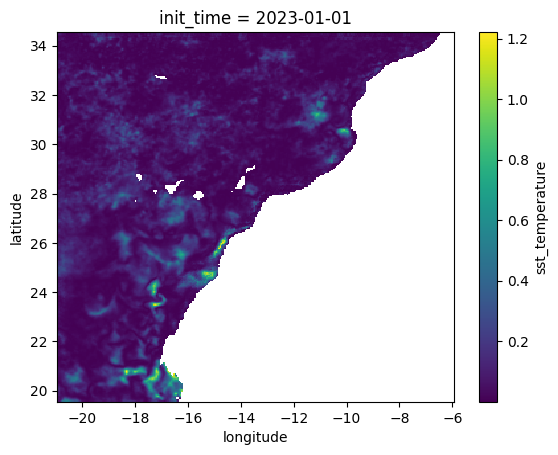

In [ ]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].isel(init_time=0).plot()